In [1]:
%cd /home/mrearle/repos/R2R-EnvDrop-ObjAttn/

/mnt-homes/kraken/mrearle/repos/R2R-EnvDrop-ObjAttn


In [2]:
!echo $CUDA_VISIBLE_DEVICES

3


# Imports

In [3]:
import sys
import torch
import networkx as nx

metadata_parser_path = '/home/mrearle/repos/R2R-EnvDrop-ObjAttn/metadata_parser'
if metadata_parser_path not in sys.path:
    sys.path.append(metadata_parser_path)

mattersim_path = '/home/mrearle/datasets/Matterport3DSimulator/build'
if mattersim_path not in sys.path:
    sys.path.append(mattersim_path)
    
src_path = '/home/mrearle/repos/R2R-EnvDrop-ObjAttn/r2r_src'
if src_path not in sys.path:
    sys.path.append(src_path)


In [4]:
from parse_house_segmentations import HouseSegmentationFile

# Setup Agent

In [18]:
%%capture cap
from importlib import reload
import visualization_v2.agent_utils as agent_utils
reload(agent_utils)
setup_and_run_agent = agent_utils.setup_and_run_agent


In [67]:
%%capture cap
agent_result, object_attentions, viewpoint_attentions = setup_and_run_agent(
    base_name="obj",
    max_obj_number=32,
    obj_aux_task = True,
    include_objs = True,
    reduced_envs = True,
    dataset = "craft",
    logging_vis=True,
    attach_hooks=True,
)

# Visualization

## Parse trajectory data

In [68]:
import importlib
from visualization_v2 import instruction_utils, iterator_utils, plotting, visualization_data_parser
importlib.reload(visualization_data_parser)
importlib.reload(iterator_utils)
importlib.reload(instruction_utils)
importlib.reload(plotting)

get_result_iterator = iterator_utils.get_traj_result_iterator
map_result_data = iterator_utils.map_result
get_instruction_function = instruction_utils.get_instruction_function
make_plots = plotting.make_plots

In [69]:
get_instruction = get_instruction_function('./semantically_richer_instructions/R2R_craft_val_unseen.json')
result_iterator = get_result_iterator(object_attentions, viewpoint_attentions)

## Plotting

In [70]:
import matplotlib
%matplotlib inline

In [71]:
i = 0
for j, item in enumerate(object_attentions[0][0]):
    if item['instr_id'] in ['5835_0',
 '5345_0',
 '1865_0',
 '1335_0',
 '3017_0',
 '3858_0',
 '431_0',
 '3952_0',
 '1478_0',
 '1648_0']:
        i = j
        break
i

46

In [72]:
# Initialize iterator to be able to send environment
next(result_iterator)
result_iterator.send(-1)
pass

In [83]:
# Get environment information and results
# Success 0
env_i = 3
env_data = map_result_data(env_i, agent_result, result_iterator.send(env_i), get_instruction)
env_data['hook_info']['instr_id']

'3822_0'

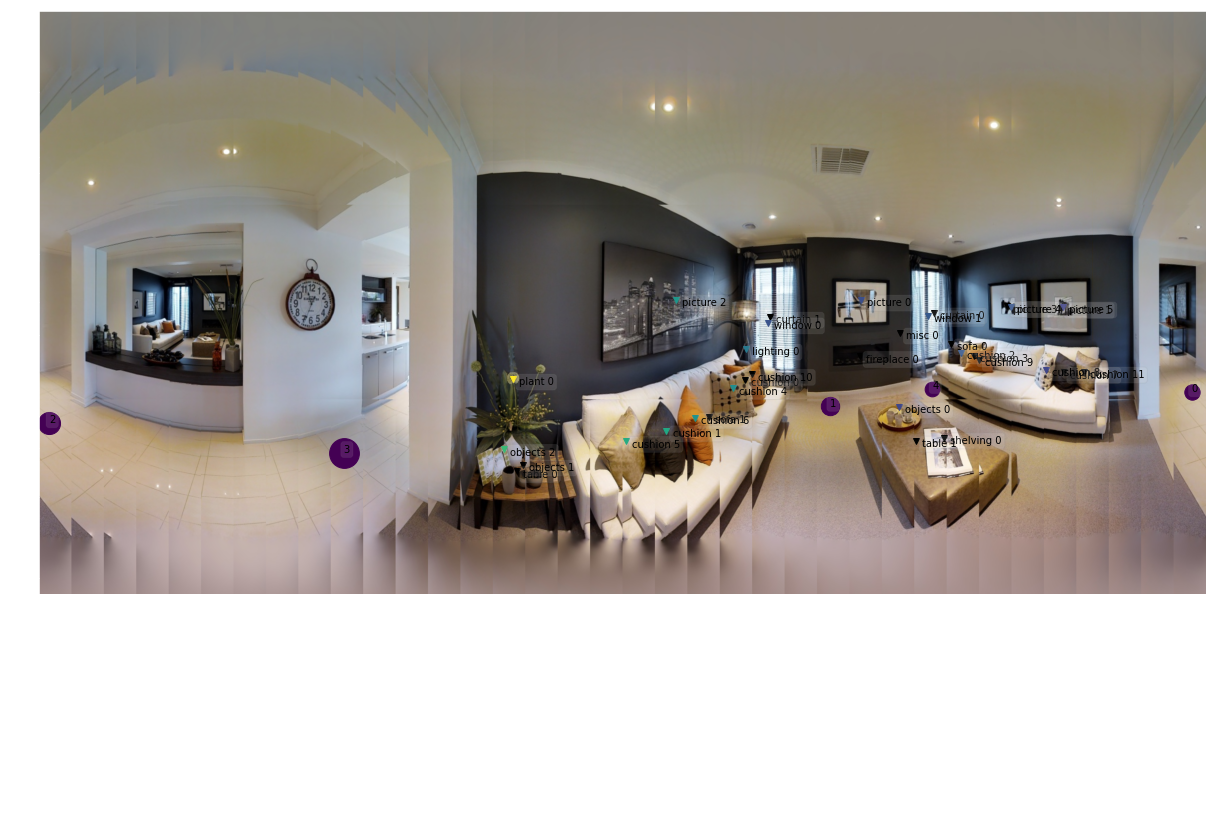

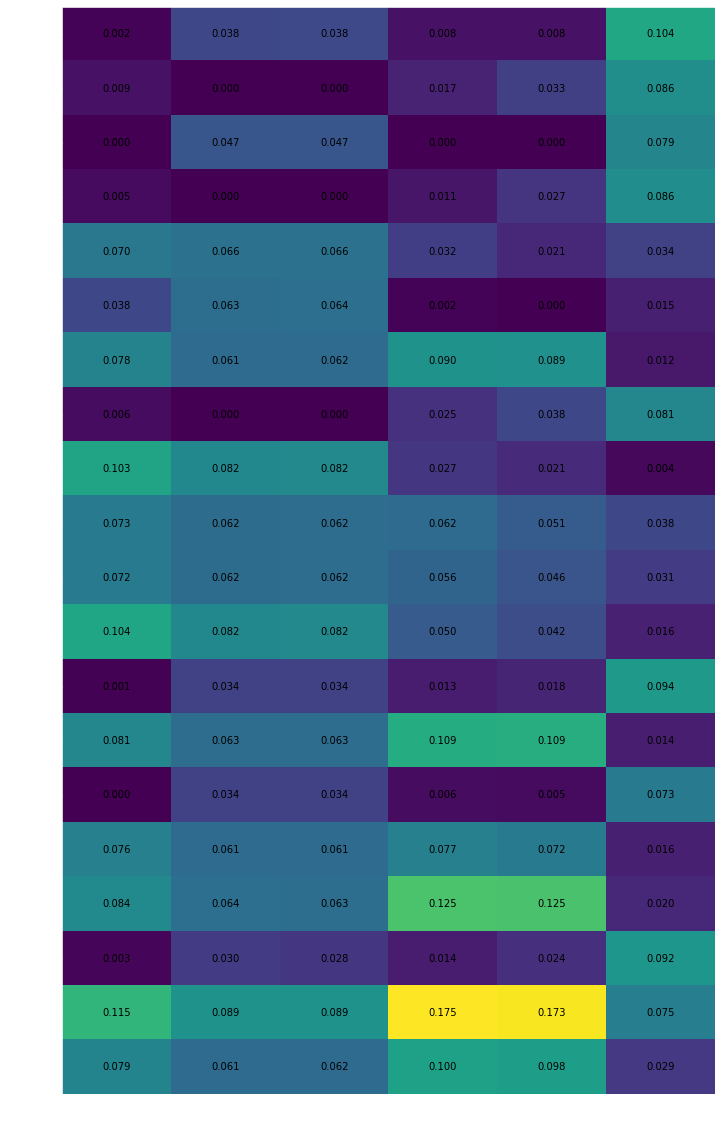

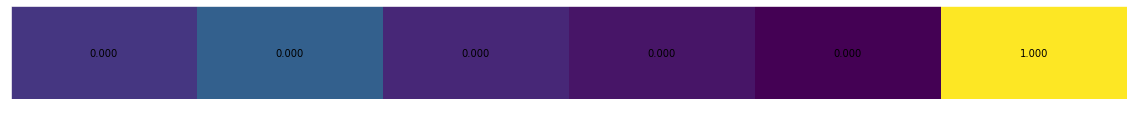

In [84]:
make_plots(
    info=env_data['hook_info'],
    viewpoint_attn=env_data['view_attn'],
    candidates=env_data['viewpoint_names'],
    object_attention=env_data['object_attn'],
    instruction=env_data['instruction'],
)

In [ ]:
env_data['agent_trajectory']

['6d784ba8b85d498180f61a7f0fa7d121',
 '7b8148447e3948a59e2a7f7182d79f21',
 'c69f595ae3e646ee9e447c87de461ab6',
 '2b519d8eee9c4abb88444a397e87cd6f',
 '062a2a53b6fd44ea8bc55cc1dfa859ae',
 'd8d0fa6bfcd541889d727767910ea39e',
 '28f3297274c545d68ecef3660694ceb4']